In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("student_performance_large_dataset.csv")
print(df.head())
print(df.info())
print(df.describe())

  Student_ID  Age  Gender  Study_Hours_per_Week Preferred_Learning_Style  \
0     S00001   18  Female                    48              Kinesthetic   
1     S00002   29  Female                    30          Reading/Writing   
2     S00003   20  Female                    47              Kinesthetic   
3     S00004   23  Female                    13                 Auditory   
4     S00005   19  Female                    24                 Auditory   

   Online_Courses_Completed Participation_in_Discussions  \
0                        14                          Yes   
1                        20                           No   
2                        11                           No   
3                         0                          Yes   
4                        19                          Yes   

   Assignment_Completion_Rate (%)  Exam_Score (%)  Attendance_Rate (%)  \
0                             100              69                   66   
1                              71 

In [10]:
df.fillna(df.select_dtypes(include=[np.number]).mean(), inplace=True)
print(df.isnull().sum())

Student_ID                                 0
Age                                        0
Gender                                     0
Study_Hours_per_Week                       0
Preferred_Learning_Style                   0
Online_Courses_Completed                   0
Participation_in_Discussions               0
Assignment_Completion_Rate (%)             0
Exam_Score (%)                             0
Attendance_Rate (%)                        0
Use_of_Educational_Tech                    0
Self_Reported_Stress_Level                 0
Time_Spent_on_Social_Media (hours/week)    0
Sleep_Hours_per_Night                      0
Final_Grade                                0
dtype: int64


In [ ]:
print(df.columns)
label_encoders = {}
categorical_columns = ['Gender', 'Preferred_Learning_Style', 'Participation_in_Discussions']

for col in categorical_columns:
    if col in df.columns:  
        df[col].fillna(df[col].mode()[0], inplace=True)  
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le  

numerical_columns = [
    'Age', 'Study_Hours_per_Week', 'Online_Courses_Completed', 
    'Exam_Score (%)', 'Attendance_Rate (%)', 
    'Self_Reported_Stress_Level', 'Time_Spent_on_Social_Media (hours/week)', 
    'Sleep_Hours_per_Night'
]

for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  
    df[col].fillna(df[col].mean(), inplace=True)  

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Data after cleaning:", df.shape)

Index(['Student_ID', 'Age', 'Gender', 'Study_Hours_per_Week',
       'Preferred_Learning_Style', 'Online_Courses_Completed',
       'Participation_in_Discussions', 'Assignment_Completion_Rate (%)',
       'Exam_Score (%)', 'Attendance_Rate (%)', 'Use_of_Educational_Tech',
       'Self_Reported_Stress_Level', 'Time_Spent_on_Social_Media (hours/week)',
       'Sleep_Hours_per_Night', 'Final_Grade'],
      dtype='object')
Data after cleaning: (10000, 15)


/tmp/ipykernel_9710/199673976.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipykernel_9710/199673976.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [23]:
grade_mapping = {
    'A+': 100, 'A': 90, 'A-': 85,
    'B+': 80, 'B': 75, 'B-': 70,
    'C+': 65, 'C': 60, 'C-': 55,
    'D+': 50, 'D': 45, 'D-': 40,
    'F': 30  # Failing grade
}

# Convert grades to numeric
df["Final_Grade"] = df["Final_Grade"].map(grade_mapping)

# Drop rows where Final_Grade is NaN (due to unmapped values)
df = df.dropna(subset=["Final_Grade"])

# Define Features & Target
target_column = "Final_Grade"
X = df.drop(columns=['Student_ID', target_column], errors='ignore')
y = df[target_column]

# Encode Categorical Features
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))  # Convert to string before encoding
    label_encoders[col] = le

# Fill Missing Values in Numerical Columns
for col in X.columns:
    if X[col].dtype in ['float64', 'int64']:
        X[col].fillna(X[col].mean(), inplace=True)

# Standardize Numerical Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Decision Tree Model
model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
R² Score: 1.0


/tmp/ipykernel_9710/697761987.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].mean(), inplace=True)
/home/chaaivisva/Chaaivisva/Projects/ML-Project/venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/chaaivisva/Chaaivisva/Projects/ML-Project/venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum /

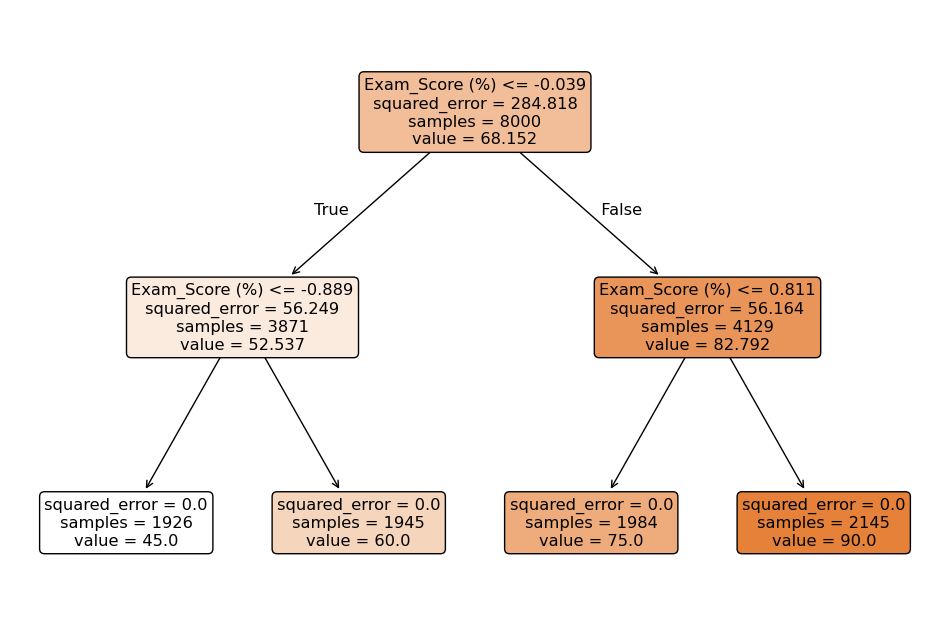

In [27]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.show()

In [ ]:
new_student = np.array([[1, 18, 10, 2, 2, 85, 7, 6, 3, 1, 5, 4, 80]])  # Example values

def predict_grade(input_data):
    new_student_df = pd.DataFrame(new_student, columns=X.columns)

    # Encode categorical variables safely (handling unseen categories)
    for col in categorical_columns:
        if col in new_student_df.columns:
            # Convert to string before transformation
            new_student_df[col] = new_student_df[col].astype(str)
            
            # Handle unseen categories by mapping them to the most common value in training
            new_student_df[col] = new_student_df[col].apply(
                lambda x: x if x in label_encoders[col].classes_ else label_encoders[col].classes_[0]
            )
            
            # Now apply the label encoder
            new_student_df[col] = label_encoders[col].transform(new_student_df[col])

    # Apply scaling to numerical features
    new_student_scaled = scaler.transform(new_student_df)

    # Make prediction
    predicted_grade = model.predict(new_student_scaled)
    print("Predicted Grade:", predicted_grade[0])

Predicted Grade: 90.0


In [ ]:
student_input = np.array([[1, 18, 10, 2, 2, 85, 7, 6, 3, 1, 5, 4, 80]]) 
predict_grade(student_input)


Categorical Column	Original Values	Encoded Values
Gender	Male, Female	Male → 0, Female → 1
Parent Education Level	High School, Bachelor, Master, PhD	High School → 0, Bachelor → 1, Master → 2, PhD → 3
Participation in Extracurriculars	Yes, No	No → 0, Yes → 1
Socioeconomic Status	Low, Medium, High	Low → 0, Medium → 1, High → 2
Internet Access at Home	Yes, No	No → 0, Yes → 1



Feature Name	Value	Description (Assumed)
Feature 1	1	(Example: Gender - Encoded)
Feature 2	18	(Example: Age)
Feature 3	10	(Example: Study Hours per Week)
Feature 4	2	(Example: Number of Siblings)
Feature 5	2	(Example: Parent Education Level - Encoded)
Feature 6	85	(Example: Exam Score in %)
Feature 7	7	(Example: Self-Reported Stress Level)
Feature 8	6	(Example: Sleep Hours per Night)
Feature 9	3	(Example: Participation in Extracurriculars - Encoded)
Feature 10	1	(Example: Socioeconomic Status - Encoded)
Feature 11	5	(Example: Internet Access at Home - Encoded)
Feature 12	4	(Example: Parent Involvement Score)
Feature 13	80	(Example: Previous Semester Score)